In [36]:
import numpy as np


In [68]:
class Net:
    def __init__(self, topology):
        self.numLayers     = len(topology)
        self.learning_rate = 0.1
        
        self.W1 = np.random.rand(2, 2)
        self.W2 = np.random.rand(1,2) 
        
        self.bW1 = np.random.rand(1, 2) 
        self.bW2 = np.random.rand(1, 1) 
            
    def _sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))
    
    
    def feedForward(self, input_vectors):
        self.Z1 = np.matmul(input_vectors, self.W1) + self.bW1 
        self.A1 = self._sigmoid(self.Z1)
        self.Z2 = np.matmul(self.A1, self.W2.T) + self.bW2 
        self.A2 = self.Z2 
        return self.A2
        
    def backProp(self, input_vectors, target):
        dC_dA2 = self.A2 - target 
        dC_dZ2 = dC_dA2 * self._sigmoid_deriv(self.Z2)
        
        dC_dW2 = dC_dZ2 * self.A1
        dC_dW1 = dC_dZ2 * self.W2 * self._sigmoid_deriv(self.Z1)* input_vectors
        
        dW2       = dC_dW2
        dW1       = dC_dW1
        db2       = np.sum(dC_dA2 * self._sigmoid_deriv(self.Z2))
        db1       = np.sum(dC_dA2 * self._sigmoid_deriv(self.Z2) * self.W2 * self._sigmoid_deriv(self.Z1))
        
        return dW1, dW2, db1, db2
        
    def update_params(self, input_vectors, target, dW1, db1, dW2, db2):    
        #updates
        #adjust the weights
        self.W1 = self.W1 - self.learning_rate * dW1
        self.W2 = self.W2 - self.learning_rate * dW2
        
        self.bW1 = self.bW1 - self.learning_rate * db1
        self.bW2 = self.bW2 - self.learning_rate * db2

        
    #to train the network
    def train(self, input_vectors, targets, iterations):
        error_vals = []
        for current_iteration in range(iterations):
            #pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors))
            
            input_vector = input_vectors[random_data_index]
            target = targets[random_data_index]
            
            out = self.feedForward(input_vector)
        
            dW1, dW2, db1, db2 = self.backProp(input_vector, target)
            
            self.update_params(input_vector, target, dW1, db1, dW2, db2)
            
            error = np.square(out - target)
            if current_iteration % 100 == 0:

                    #print(error)
                    error_vals = np.append(error_vals, error)
    
        return error_vals
            


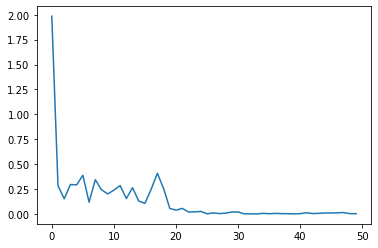

In [74]:
import matplotlib.pyplot as plt
topo = [2, 2, 1] 

input_vectors = np.array(
[
    [3, 1.5],
    [2, 11],
    [4, 1.5],
    [13, 14],
    [3.5, 0.5],
    [2, 10.5],
    [5.5, 13],
    [3, 1],
])

targets = np.array([0, 1, 0, 1, 0, 1, 1, 0])

makeNet = Net(topo)
error = makeNet.train(input_vectors, targets, 5000)

plt.plot(error)


In [76]:
makeNet.feedForward([2, 10])

array([[0.92598533]])